Question 9 Write a program to read the data from the following link, perform data analysis and answer the following questions Note 1. Write code comments wherever required for code understanding
Link - https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD
Insights to be drawn 
● Get all the cars and their types that do not qualify for clean alternative fuel vehicle
● Get all TESLA cars with the model year, and model type made in Bothell City.
● Get all the cars that have an electric range of more than 100, and were made after 2015
● Draw plots to show the distribution between city and electric vehicle type

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
# constructing dataframe
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')
df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP5D,King,Seattle,WA,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36.0,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130438,7SAYGDEE6P,Pierce,Gig Harbor,WA,98335.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,26.0,231134102,POINT (-122.58354539999999 47.32344880000005),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10
130439,1N4BZ1CV7N,Pierce,Tacoma,WA,98408.0,2022,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,29.0,185810943,POINT (-122.43810499999995 47.203220000000044),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
130440,5YJYGDEE8M,King,Seattle,WA,98109.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,36.0,176542418,POINT (-122.35022 47.63824),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
130441,5YJXCBE22L,Island,Camano Island,WA,98282.0,2020,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,293,0,10.0,102834938,POINT (-122.40049 48.23986),BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOH...,5.302997e+10


In [8]:
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].unique()

array(['Clean Alternative Fuel Vehicle Eligible',
       'Not eligible due to low battery range',
       'Eligibility unknown as battery range has not been researched'],
      dtype=object)

### Get all the cars and their types that do not qualify for clean alternative fuel vehicle

In [12]:
non_clean_cars = df[(df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"] != 'Clean Alternative Fuel Vehicle Eligible')]
non_clean_cars[['Make', 'Model','Electric Vehicle Type'] ]         

,Make,Model,Electric Vehicle Type
6,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV)
7,AUDI,Q5 E,Plug-in Hybrid Electric Vehicle (PHEV)
8,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV)
11,TESLA,MODEL Y,Battery Electric Vehicle (BEV)
14,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV)
...,...,...,...
130437,BMW,530E,Plug-in Hybrid Electric Vehicle (PHEV)
130438,TESLA,MODEL Y,Battery Electric Vehicle (BEV)
130439,NISSAN,LEAF,Battery Electric Vehicle (BEV)
130440,TESLA,MODEL Y,Battery Electric Vehicle (BEV)


### Get all TESLA cars with the model year, and model type made in Bothell City.

In [21]:
tesla_cars = df[(df['Make'] == 'TESLA') & (df['City'] == 'Bothell')][['Model Year','Model']]
tesla_cars

,Model Year,Model
39,2020,MODEL 3
217,2022,MODEL 3
218,2022,MODEL Y
222,2018,MODEL 3
292,2017,MODEL X
...,...,...
129778,2019,MODEL 3
129954,2021,MODEL 3
129976,2014,MODEL S
130295,2022,MODEL 3


### Get all the cars that have an electric range of more than 100, and were made after 2015


In [24]:
electric_cars = df[(df['Electric Range'] > 100) & (df['Model Year'] > 2015)][['Make','Model']]
electric_cars

,Make,Model
0,TESLA,MODEL X
2,TESLA,MODEL 3
4,TESLA,MODEL S
12,TESLA,MODEL 3
13,TESLA,MODEL 3
...,...,...
130417,TESLA,MODEL Y
130428,NISSAN,LEAF
130432,TESLA,MODEL Y
130436,TESLA,MODEL 3


### Draw plots to show the distribution between city and electric vehicle type

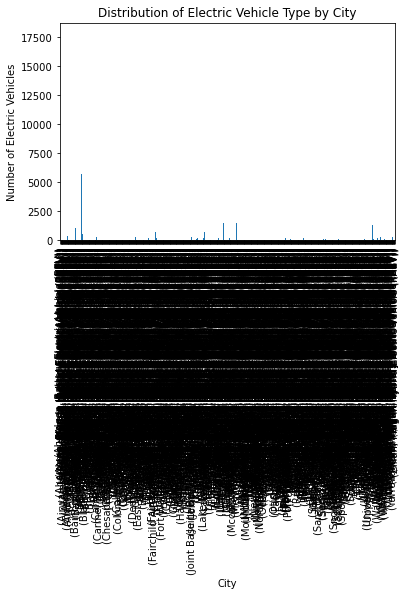

In [29]:
city_electric_count = df.groupby(['City', 'Electric Vehicle Type']).size()
city_electric_count.plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Number of Electric Vehicles')
plt.title('Distribution of Electric Vehicle Type by City')
plt.show()

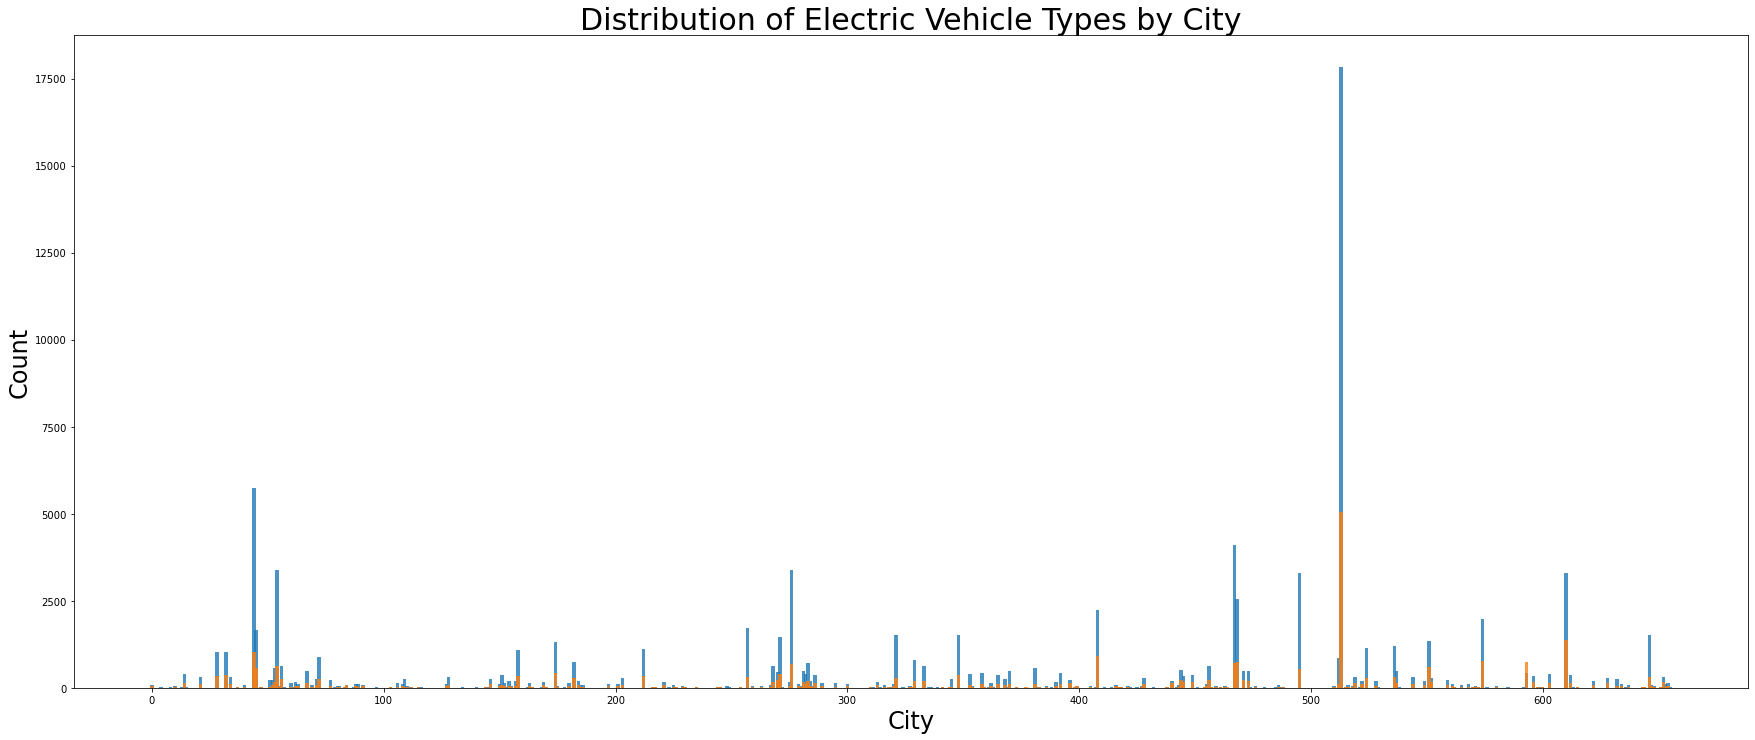

In [42]:
grouped_data = df.groupby(['City', 'Electric Vehicle Type']).size().unstack()

# Plot the distribution using a stacked bar chart
fig, ax = plt.subplots(figsize=(30, 12))  # Adjust the height here

# Set the width of each bar
bar_width = 1.5

# Create a list of x positions for the bars
x = range(len(grouped_data.index))

# Plot each electric vehicle type as a separate bar
for i, j in enumerate(grouped_data.columns):
    ax.bar(x, grouped_data[j], width=bar_width, label=j, alpha=0.8)

# Set labels and title
plt.xlabel('City', fontsize=24)
plt.ylabel('Count', fontsize=24)
plt.title('Distribution of Electric Vehicle Types by City', fontsize=30)
legend_title = 'Electric Vehicle Type'
plt.show()